In [45]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv('diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.shape

(768, 9)

In [5]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


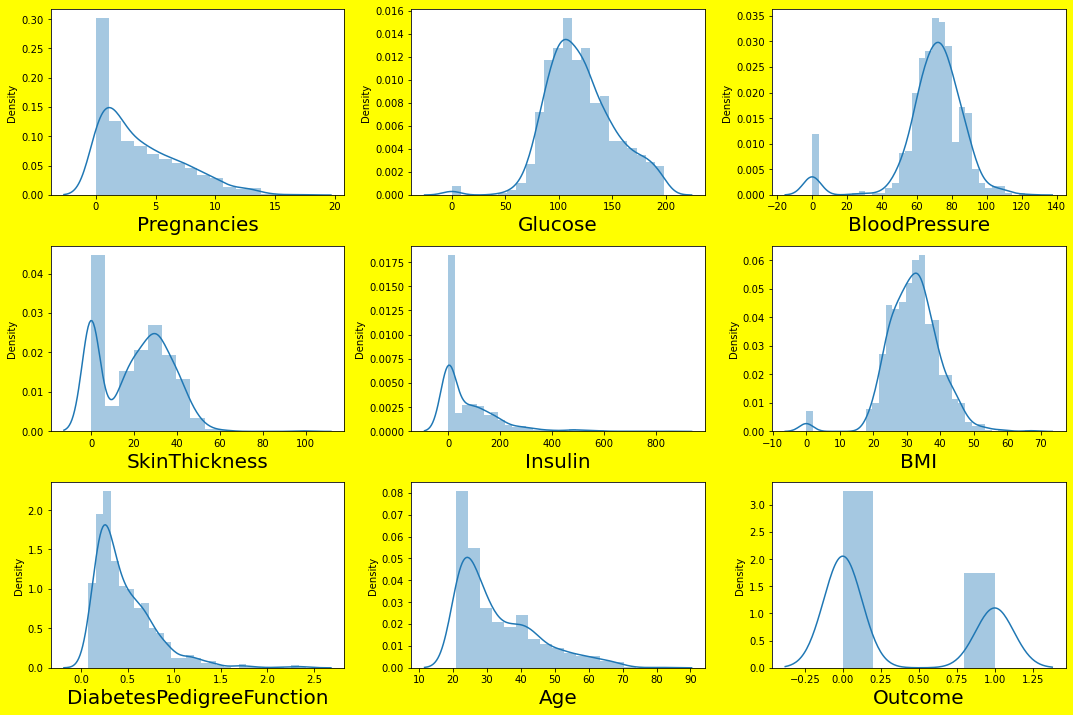

In [7]:
plt.figure(figsize=(15,10), facecolor="yellow")
plotnumber= 1
for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

# We can see that there is skewness in the data. Few data for columns Glucose, Insulin, SkinThickness, BMI, and BloodPressure
# have value = 0 which is not possible for a living person.

In [8]:
# Replacing zero values with the mean of the corresponding column
data['Glucose']= data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin']= data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness']= data['SkinThickness'].replace(0,data['SkinThickness'].mean())
data['BMI']= data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure']= data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


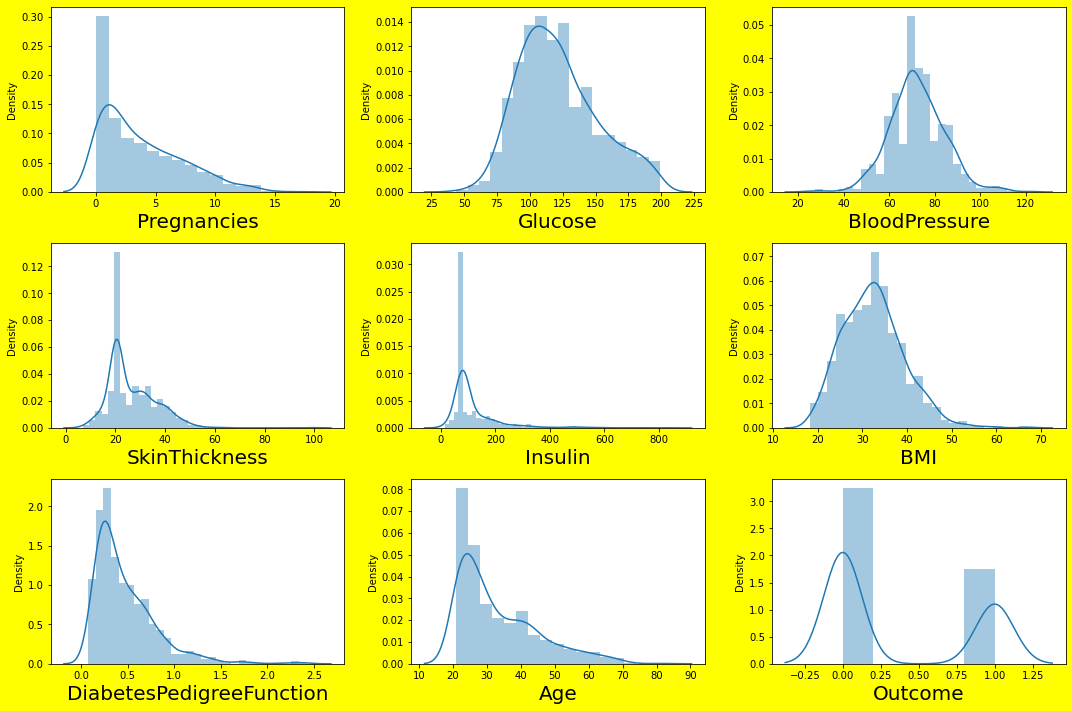

In [9]:
# Lets see how the graphs look like now.
plt.figure(figsize=(15,10), facecolor="yellow")
plotnumber= 1
for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [12]:
df_features = data.drop(columns=['Outcome'])
df_features.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33


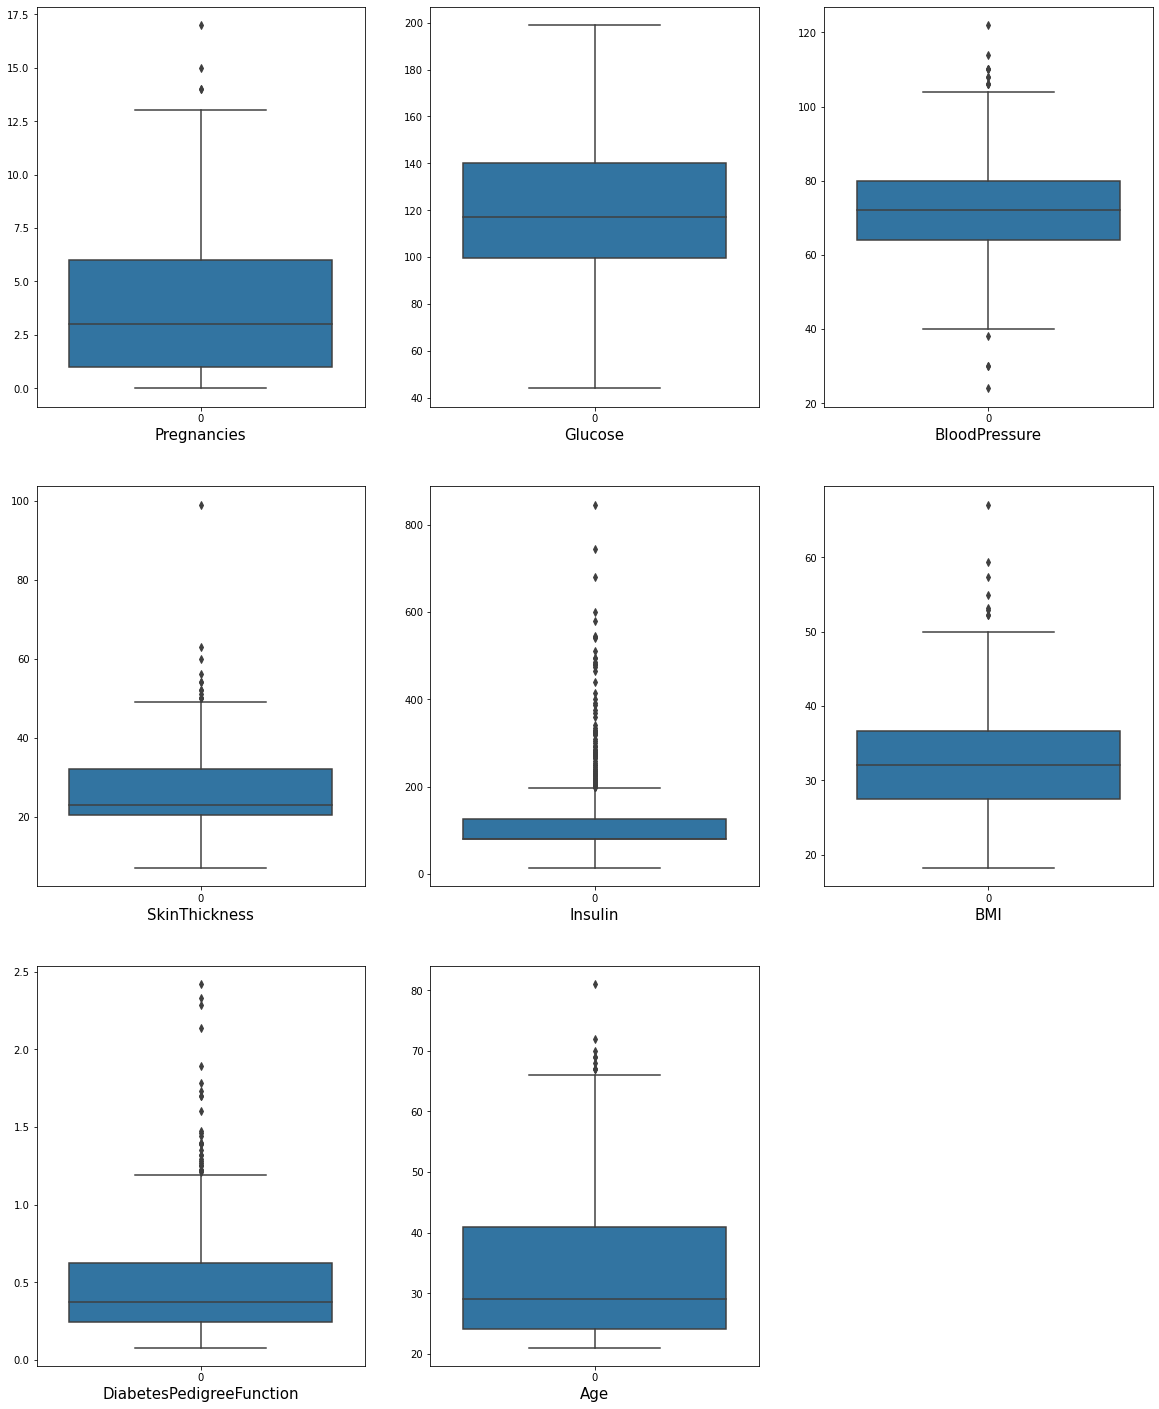

In [16]:
# Let's check for outliers using boxplot
plt.figure(figsize=(20,25))
graph= 1
for column in df_features:
    if graph<=9:
        plt.subplot(3,3,graph)
        ax= sns.boxplot(data= df_features[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

In [17]:

q1= data.quantile(0.25)
q3= data.quantile(0.75)
iqr= q3-q1

In [18]:
preg_high= q3.Pregnancies + (1.5*iqr.Pregnancies)
index= np.where(data['Pregnancies']>preg_high)
data=data.drop(data.index[index])

In [20]:
bp_high= q3.BloodPressure + (1.5*iqr.BloodPressure)
index= np.where(data['BloodPressure']>bp_high)
data=data.drop(data.index[index])

In [21]:
skin_high= q3.SkinThickness + (1.5*iqr.SkinThickness)
index= np.where(data['SkinThickness']>skin_high)
data=data.drop(data.index[index])

In [22]:
insulin_high= q3.Insulin + (1.5*iqr.Insulin)
index= np.where(data['Insulin']>insulin_high)
data=data.drop(data.index[index])

In [23]:
bmi_high= q3.BMI + (1.5*iqr.BMI)
index= np.where(data['BMI']>bmi_high)
data=data.drop(data.index[index])

In [24]:
dpf_high= q3.DiabetesPedigreeFunction + (1.5*iqr.DiabetesPedigreeFunction)
index= np.where(data['DiabetesPedigreeFunction']>dpf_high)
data=data.drop(data.index[index])

In [26]:
data.shape

(631, 9)

In [28]:
data.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
626,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
627,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
628,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
629,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [30]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000
mean,3.800317,117.385852,71.496967,25.197166,91.374988,31.510659,0.417786,33.007924,0.309033
std,3.226094,28.251419,11.268455,8.174661,33.629324,6.248418,0.244293,11.774398,0.462462
min,0.000000,44.000000,24.000000,8.000000,15.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,97.000000,64.000000,20.536458,79.799479,26.800000,0.236500,24.000000,0.000000
50%,3.000000,112.000000,70.000000,20.536458,79.799479,31.600000,0.342000,29.000000,0.000000
75%,6.000000,133.000000,78.000000,31.000000,94.000000,35.350000,0.567000,40.000000,1.000000
max,13.000000,197.000000,104.000000,49.000000,196.000000,50.000000,1.191000,81.000000,1.000000


In [31]:
X = data.drop(columns=['Outcome'])
y = data['Outcome']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [33]:
# Check for multicollinearity usinf VIF
vif=pd.DataFrame()
vif['vif']= [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]

In [34]:
vif['Features'] = X.columns

In [35]:
# All vif values are less than 5 and quite low. So looks like no multicollinearity
print(vif)

        vif                  Features
0  1.396033               Pregnancies
1  1.250111                   Glucose
2  1.247999             BloodPressure
3  1.409933             SkinThickness
4  1.191874                   Insulin
5  1.440890                       BMI
6  1.035290  DiabetesPedigreeFunction
7  1.572207                       Age


In [36]:
x_train,x_test,y_train,y_test= train_test_split(X_scaled,y,test_size=0.25, random_state=368)

In [39]:
log_reg= LogisticRegression()

In [40]:
log_reg.fit(x_train,y_train)

LogisticRegression()

In [41]:
y_pred = log_reg.predict(x_test)

In [43]:
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.759493670886076


In [44]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[97 16]
 [22 23]]


In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       113
           1       0.59      0.51      0.55        45

    accuracy                           0.76       158
   macro avg       0.70      0.68      0.69       158
weighted avg       0.75      0.76      0.75       158



In [48]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
print("Threshold:", thresholds)
print("True Positive Rate:", tpr)
print("False Positive Rate:", fpr)

Threshold: [2 1 0]
True Positive Rate: [0.         0.51111111 1.        ]
False Positive Rate: [0.         0.14159292 1.        ]


In [49]:
auc_score = roc_auc_score(y_test, y_pred)
print(auc_score)

0.6847590953785644
